<a href="https://colab.research.google.com/github/DrorArbiv/ML-Diabetes-Project/blob/main/Code_and_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Statistical Learning Final Project**
## *Submitted by: Dror Arbiv & Eynat Sela *





### Our goal in this task is to predict **diabetes** based on several demographic indicators and helath variables which explained later. The data is from Kaggle and was approved by the supervisers of the "Statistical Learning" course Bella and Sahar.

#### Our primary objective is to predict whether an individual has diabetes using only variables that do not require visiting a doctor or clinic. A successful prediction model will allow to identify diabetic patients using few resources, and by that enabling more effective medical treatment.


refrences:
kaggle kernels output alexteboul/diabetes-health-indicators-dataset-notebook -p https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset

In [ ]:
# general imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


## Exploratory Data Analysis


In [ ]:
# reading file
file_name = "/content/diabetes_binary_5050split_health_indicators_BRFSS2015.csv"
diabetes_df = pd.read_csv(file_name)

# Looking at the data
nrow,ncol= diabetes_df.shape
columns_name= diabetes_df.columns
diabetes_df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,0,1,26,0,0,0,1,0,...,1,0,3,5,30,0,1,4,6,8
1,0,1,1,1,26,1,1,0,0,1,...,1,0,3,0,0,0,1,12,6,8
2,0,0,0,1,26,0,0,0,1,1,...,1,0,1,0,10,0,1,13,6,8
3,0,1,1,1,28,1,0,0,1,1,...,1,0,3,0,3,0,1,11,6,8
4,0,0,0,1,29,1,0,0,1,1,...,1,0,2,0,0,0,0,8,5,8


### **Columns Explanation:**
#### **Predictors Variables**
- **HighBP**: High blood pressure indicator.
- **HighChol**: High cholesterol indictor.
- **CholCheck**: There was cholesterol check in 5 years indicator.
- **Smoker**: Indicates whether the individual has smoked at least 100 cigarettes in their entire life.
- **Stroke**: Indicates whether the individual had a stroke.
- **HeartDiseaseorAttack**: Indicates whether the individual has been diagnose with coronary heart disease (CHD) or myocardial infarction (MI).
- **PhysActivity**: Physical activity in past 30 days indicator.
- **Fruits**: Consuming Fruit 1 or more times per day indicator.
- **Veggies**: Consuming Vegetables 1 or more times per day indicator
- **HvyAlcoholConsump**: Indicates whether the individual engages in heavy alcohol consumption per week (>14 for men and >7 for women).
- **AnyHealthcare**: Indicates whether the individual have any kind of health care coverage, including health insurance, prepaid plans such as HMO, etc.
- **NoDocbcCost**: Indicates whether there was a time in the past 12 months when the individual needed to see a doctor but could not due to cost constraints.
- **GenHlth**: Health scale, 1 = excellent 2 = very good 3 = good 4 = fair 5 = poor
- **MentHlth**: Poor mental health days in past 30 days
- **PhysHlth**: Physical illness or injury days in past 30 days
- **DiffWalk**: Indicates whether the individual has serious difficulty walking or climbing stairs.
- **Sex**: 0 = female 1 = male
- **Age**: 13-level age category, 1 = 18-24, 9 = 60-64, 13 = 80 or older (will be converted to continuous later on)
- **Education**: Education level scale 1-6, 1 = Never attended school or only kindergarten 2 = elementary etc.
- **Income**: Income scale 1-8, 1 = less than 10k usd, 5 = less than 35k usd, 8 = 75k usd or more
- **BMI**: Numerical for Body Mass Index

#### **Predicted Variable**
- **Diabetes_binary**: Diabetes indicator.


### Checking columns frequency:

In [ ]:
for i in columns_name:
  if min(diabetes_df[i]) == 0 and max(diabetes_df[i])==1:
    freq = sum(diabetes_df[i]==1)/nrow
    print("Frequency of True for", i, "is", round(freq,3))

Frequency of True for Diabetes_binary is 0.5
Frequency of True for HighBP is 0.563
Frequency of True for HighChol is 0.526
Frequency of True for CholCheck is 0.975
Frequency of True for Smoker is 0.475
Frequency of True for Stroke is 0.062
Frequency of True for HeartDiseaseorAttack is 0.148
Frequency of True for PhysActivity is 0.703
Frequency of True for Fruits is 0.612
Frequency of True for Veggies is 0.789
Frequency of True for HvyAlcoholConsump is 0.043
Frequency of True for AnyHealthcare is 0.955
Frequency of True for NoDocbcCost is 0.094
Frequency of True for DiffWalk is 0.253
Frequency of True for Sex is 0.457



We can see above that there are several **almost-homogeneous variables**, a situation that can make it difficult for the model to train on them:

- CholCheck - most people have cholesterol check in the last 5 years.
- Stroke - most people did not had a stroke.
- HvyAlcoholConsump - most people is not heavy alcohol consuming
- AnyHealthcare - most people have some kind of health care
- NoDocbcCost - most people did not had a problem with money when they needed a doctor.

#### **Variables which were transformed**


We tried to convert as many variables as we could to numeric ones. \\
working with those models with categorical variables or with scale variable could be hurtful. \\
Our categorical but not binary variables are: **Age, GenHlth, Income, Education**.
MentHlth and PhysHlth are the number of days in month (0-30), meaning -- continuous.

> For this reason, we decided to convert the categorical variables age, education, income to  continuous-numeric. \\
The cahnge was made using the relevent codebook - _AGEG5YR ,EDUCA ,INCOME2 (noted in kaggle's documentation).

We decided to use a uniform distribution for each variable category, under the assumption that individuals within each group uniformly in our dataset. \\
This decision aims to introduce variability within each variable group, thereby better capturing the diversity present in our data.

About the **GenHlth** - on the one hand there was no codebook for it (so we could not convert it to continuous), but on the other hand it isn't a nominal varible so we decided to leave it unchanged.



In [ ]:
print(diabetes_df['Age'])

0         4.0
1        12.0
2        13.0
3        11.0
4         8.0
         ... 
70687     6.0
70688    10.0
70689    13.0
70690    11.0
70691     9.0
Name: Age, Length: 70692, dtype: float64


In [ ]:
# changing age to continuous variable
np.random.seed(99)
age_ranges = {
    1: (18, 24), 2: (25, 30), 3: (31, 35), 4: (36, 40),
    5: (41, 45), 6: (46, 50), 7: (51, 55), 8: (56, 60),
    9: (61, 65), 10: (66, 70), 11: (71, 75), 12: (76, 80), 13: (80, 88)
}

# Function to map age to a random value within the specified range
def map_to_random_value(range_tuple):
    return np.random.uniform(range_tuple[0], range_tuple[1])

# Create a new continuous variable with a random value within each age category
diabetes_df['ContinuousAge'] = round(diabetes_df['Age'].map(lambda x: map_to_random_value(age_ranges[x])),1)

# Drop the original Age column
diabetes_df_now = diabetes_df.drop('Age', axis=1)


In [ ]:
# presentetion of how this works
continuous_age_column = diabetes_df_now['ContinuousAge']
pd.concat([continuous_age_column, diabetes_df['Age']], axis=1) [0:16]

,ContinuousAge,Age
0,38.7,4.0
1,78.0,12.0
2,86.6,13.0
3,71.1,11.0
4,59.2,8.0
5,21.4,1.0
6,82.4,13.0
7,46.2,6.0
8,35.0,3.0
9,46.0,6.0


In [ ]:
##changing education to continuous numeric variable
education_ranges = {
    1: [0, 0], 2: [1, 8], 3: [9, 11], 4: [12, 12],
    5: [13, 15], 6: [16, 18]
}

# Create a new continuous variable with a random value within each Education category
diabetes_df_now['continuousEducation'] = round(diabetes_df['Education'].map(lambda x: map_to_random_value(education_ranges[x])),1)

# Drop the original Education column
diabetes_df_now = diabetes_df_now.drop('Education', axis=1)


In [ ]:
##changing Income to continuous numeric variable
Income_ranges = {
    1: (0, 10000), 2: (10001, 15000), 3: (15001, 20000), 4: (20001, 25000),
    5: (25001, 35000), 6: (35001, 50000), 7: (50001, 75000), 8: (75001, 100000)
}

# Create a new continuous variable with a random value within each Income category
diabetes_df_now['continuousIncome'] = round(diabetes_df['Income'].map(lambda x: map_to_random_value(Income_ranges[x])),1)

# Drop the original Education column
diabetes_df_now = diabetes_df_now.drop('Income', axis=1)

In [ ]:
diabetes_df_now.isna().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
ContinuousAge           0
continuousEducation     0
continuousIncome        0
dtype: int64

There are no missing data to clean, and the data is balanced in the response variable (Diabeted_binary) \\
Now the data is clean and ready for spliting into train and test and for modeling.

In [ ]:
# Arranging the data in random order (the original data-set was ordered by sections of 0's and 1's)
shuffled_diabetes_df = diabetes_df_now.sample(frac=1, random_state=42) #frac=1 means all rows, random_state for reproducibility

# Spliting to test and train
from sklearn.model_selection import train_test_split
train_df_diabetes, test_df_diabetes = train_test_split(shuffled_diabetes_df, test_size=0.2, random_state=42)

# Creating varibles for x,y train/test
x_train = train_df_diabetes.drop(columns=['Diabetes_binary'])
y_train = train_df_diabetes.Diabetes_binary
x_test = test_df_diabetes.drop(columns=['Diabetes_binary'])
y_test = test_df_diabetes.Diabetes_binary

# Standerazing the data
from sklearn.preprocessing import StandardScaler
scaler_train = StandardScaler(with_mean=True, with_std=True).fit(x_train)
x_train_scaled = scaler_train.transform(x_train)
scaler_test = StandardScaler(with_mean=True, with_std=True).fit(x_train)
x_test_scaled = scaler_test.transform(x_test)

For developing the most accurate model, we now move forword to **choosing our predictors**.  \\
meaning - enclosing the varibles that contribute "prediction power" and omitting all the others.




first, we'll have **Pearson Correlation matrix** -

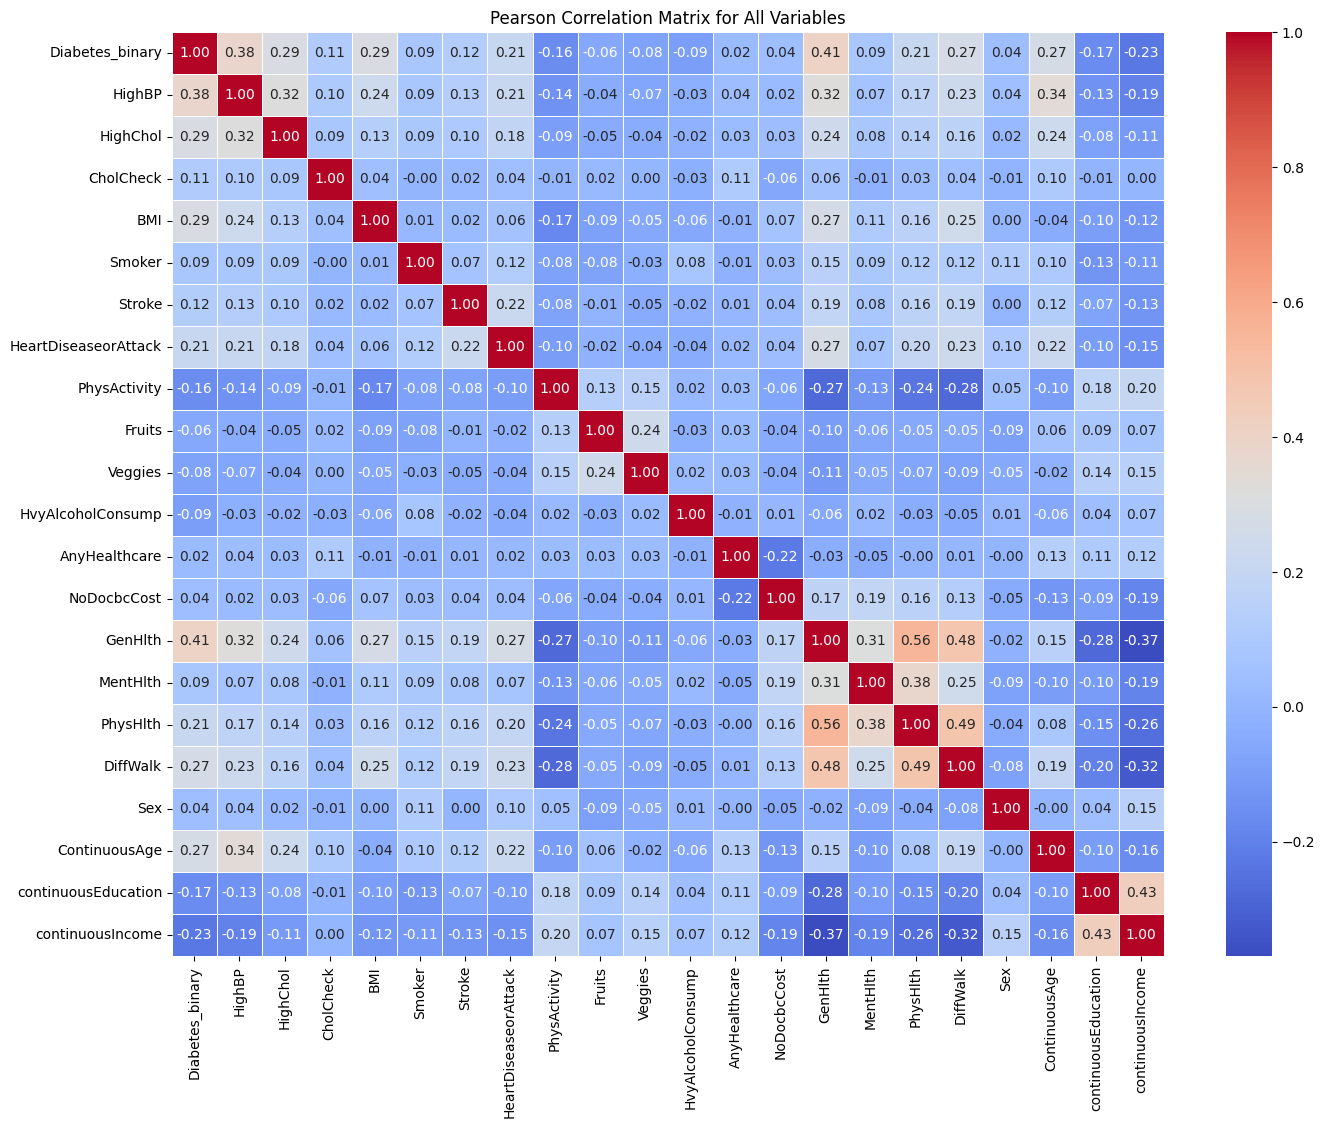

In [ ]:
# Correlation matrix
correlation_matrix = train_df_diabetes.corr(method='pearson')
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Pearson Correlation Matrix for All Variables')
plt.show()

we can see in the correlation_matrix a **linear corralation** between our varibles. Although we do not necessarily assume a linear relationship, the perason corralation matrix gives us a **basic referance** of the nature of the relationship between the varibles to the target vector - **HighBP, Genhlth, BMI, Highchol** probably will had a role in our model.

In [ ]:
columns_high_correlation = correlation_matrix[correlation_matrix['Diabetes_binary'] > 0.28].index.tolist()
columns_high_correlation.remove('Diabetes_binary')
print(columns_high_correlation)


['HighBP', 'HighChol', 'BMI', 'GenHlth']


## **Distributions of important variables with correlation to diabetes**

We will take a look at those variables to see the relationships and connections.



### **HighBP**- High blood pressure indicator.
Previous studies have shown that diabetes can harm the kidneys by causing scarring. This kidney damage can lead to an increase in blood pressure, which contributes to high BP. \\
So, we expect the HighBP variable to be high correlated to having diabetes.

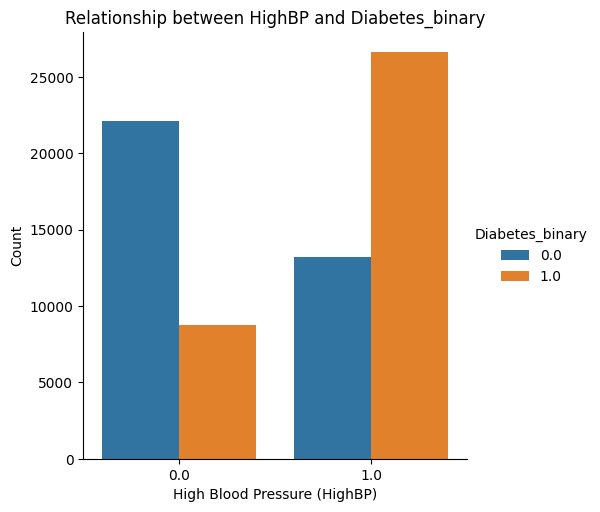

In [ ]:
counts_df = diabetes_df_now.groupby(['HighBP', 'Diabetes_binary']).size().reset_index(name='counts')

# Plot
sns.catplot(x='HighBP', y='counts', hue='Diabetes_binary', data=counts_df, kind='bar')
plt.title('Relationship between HighBP and Diabetes_binary')
plt.xlabel('High Blood Pressure (HighBP)')
plt.ylabel('Count')
plt.show()


As expected, there's a clear connection between individuals with high blood pressure and diabetes. Many individuals with high BP also have diabetes, and vice versa.

### **HighChol**- High cholesterol indictor
According to current understanding of the disease, individuals with diabetes typically exhibit lower levels of HDL (good) cholesterol and higher levels of LDL/non-HDL (bad) cholesterol. \\
Therefore, it can be inferred that the cholesterol status being checked here is indicative of bad levels.


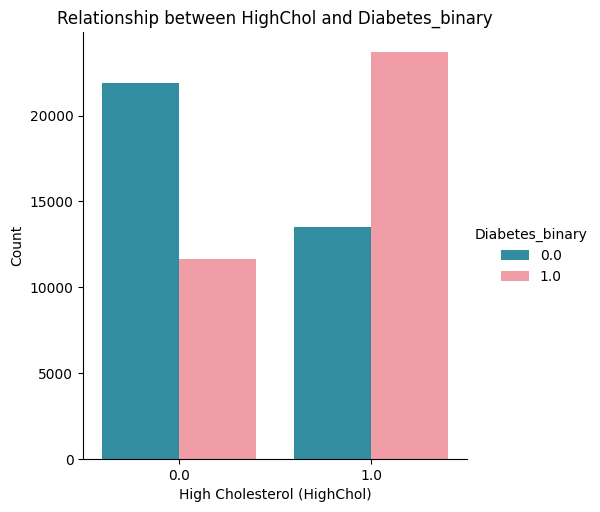

In [ ]:
counts1_df = diabetes_df_now.groupby(['HighChol', 'Diabetes_binary']).size().reset_index(name='counts')
# Plot
sns.catplot(x='HighChol', y='counts', hue='Diabetes_binary', data=counts1_df, kind='bar', palette=["#1f99b4", "#ff8f9e"])
plt.title('Relationship between HighChol and Diabetes_binary')
plt.xlabel('High Cholesterol (HighChol)')
plt.ylabel('Count')
plt.show()


Same as before, we can see clear connection between the number of people with and without diabetes and high cholesterol.

### **BMI** - Body Mass index
To date, we understand that there's a strong association between obesity and diabetes, and weight being a component in the calculation of BMI.


In [ ]:
mean_bmi_true = diabetes_df_now[diabetes_df_now['Diabetes_binary'] == True]['BMI'].mean()
mean_bmi_false = diabetes_df_now[diabetes_df_now['Diabetes_binary'] == False]['BMI'].mean()

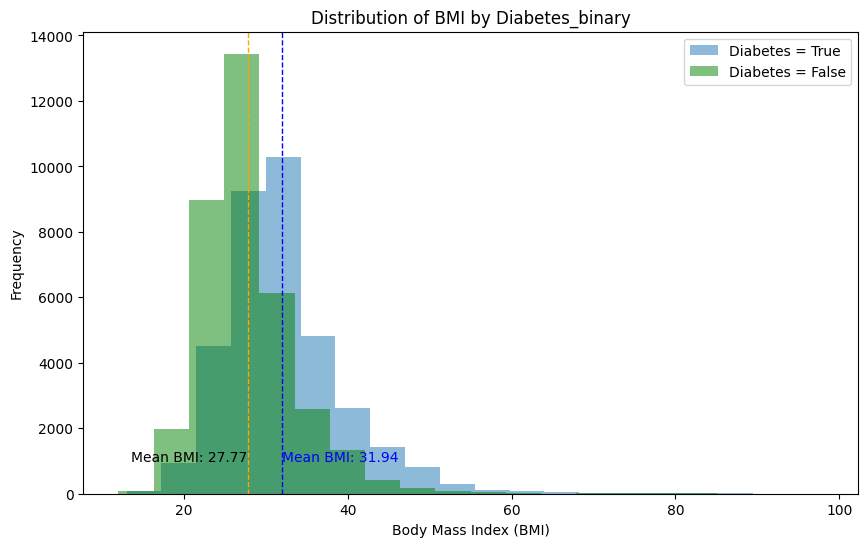

In [ ]:
plt.figure(figsize=(10, 6))

# Plot histogram for BMI distribution with true diabetes
plt.hist(diabetes_df_now[diabetes_df_now['Diabetes_binary'] == True]['BMI'], bins=20, alpha=0.5, label='Diabetes = True')

# Plot histogram for BMI distribution with false diabetes
plt.hist(diabetes_df_now[diabetes_df_now['Diabetes_binary'] == False]['BMI'], bins=20, alpha=0.5, label='Diabetes = False', color= 'green')

# Add mean values to the plot
plt.axvline(mean_bmi_true, color='blue', linestyle='dashed', linewidth=1)
plt.text(mean_bmi_true, 1000, f'Mean BMI: {mean_bmi_true:.2f}', color='blue', ha='left', fontsize=10)

plt.axvline(mean_bmi_false, color='orange', linestyle='dashed', linewidth=1)
plt.text(mean_bmi_false, 1000, f'Mean BMI: {mean_bmi_false:.2f}', color='black', ha='right', fontsize=10)

plt.title('Distribution of BMI by Diabetes_binary')
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Frequency')
plt.legend()
plt.show()


From the mean and plot of each group we can see that there is some differences in bmi between people who have diabetes and people who don't.

### **GenHlth**-

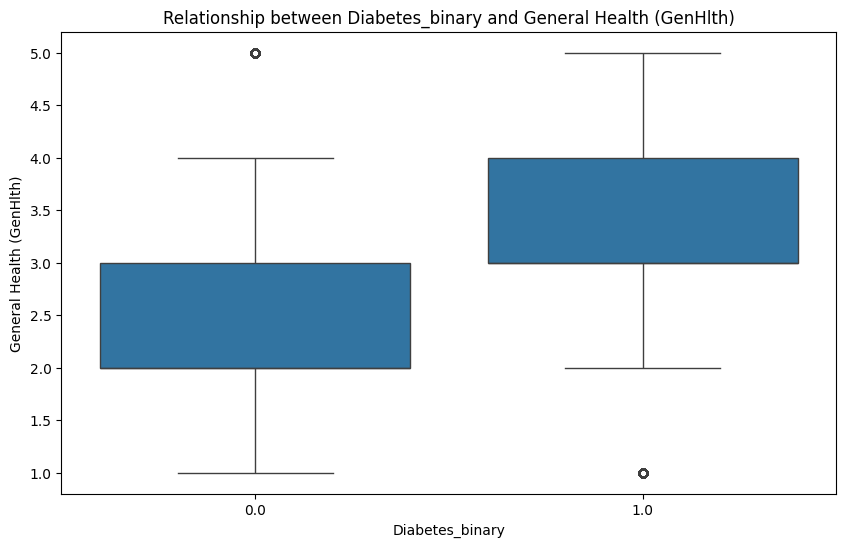

Mean GenHlth for Diabetes = True: 3.291
Mean GenHlth for Diabetes = False: 2.383


In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Diabetes_binary', y='GenHlth', data=diabetes_df_now)
plt.title('Relationship between Diabetes_binary and General Health (GenHlth)')
plt.xlabel('Diabetes_binary')
plt.ylabel('General Health (GenHlth)')
plt.show()

mean_genhlth_true = diabetes_df_now[diabetes_df_now['Diabetes_binary'] == True]['GenHlth'].mean()
mean_genhlth_false = diabetes_df_now[diabetes_df_now['Diabetes_binary'] == False]['GenHlth'].mean()

print("\033[1mMean GenHlth for Diabetes = True:\033[0m", round(mean_genhlth_true,3))
print("\033[1mMean GenHlth for Diabetes = False:\033[0m", round(mean_genhlth_false,3))


The box-plots of general health in people with diabetes and people without are very different. \\
But, **surprisingly**, people with diabetes in this study reported better general health.

Now, we will apply **Lasso** with logistic regression for reducing the nonvaluble features - \\
Least Absolute Shrinkage and Selection Operator (LASSO) is a known method that performs variable selection in order to enhance the prediction accuracy and removing the less contributed variables.

In [ ]:
# Logistic regression - choosing parameters with lasso
import random
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
random.seed(99)

# Define the parameter grid
param_grid = {
    'penalty': ['l1'],  # L1 penalty = Lasso
    'C': np.exp(np.arange(-5, 5, 0.1)),
    'solver': ['liblinear'],
    'max_iter': [1000] }  #number of iterations of the inner algorithm

# Create and fit the GridSearchCV object
gridClass = GridSearchCV(
    estimator=LogisticRegression(random_state=42),
    param_grid=param_grid,
    cv=10,
    n_jobs=-1,
    verbose=3)
res = gridClass.fit(x_train_scaled, y_train)

best_C = gridClass.best_params_['C']
print("best C = ", best_C)

# After we got the optimal value of the C (lamda), we can fit logistic reg over all the train data to get the best parameters and the model itself
best_lasso_model = LogisticRegression(penalty='l1', C=best_C, solver='liblinear')
fit_lasso_model = best_lasso_model.fit(x_train, y_train)

# Get column names from x_train
feature_names = x_train.columns
# Extract coefficients from the fitted model
coefficients = fit_lasso_model.coef_[0]




Fitting 10 folds for each of 100 candidates, totalling 1000 fits
best C =  0.006737946999085467


In [ ]:
# Create a DataFrame to store the coefficients with their corresponding feature names
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients.round(3)})

print(coefficients_df)


                 Feature  Coefficient
0                 HighBP        0.756
1               HighChol        0.549
2              CholCheck        0.000
3                    BMI        0.055
4                 Smoker        0.000
5                 Stroke        0.000
6   HeartDiseaseorAttack        0.232
7           PhysActivity       -0.067
8                 Fruits       -0.018
9                Veggies       -0.050
10     HvyAlcoholConsump       -0.406
11         AnyHealthcare        0.000
12           NoDocbcCost        0.000
13               GenHlth        0.474
14              MentHlth       -0.006
15              PhysHlth       -0.004
16              DiffWalk        0.101
17                   Sex        0.158
18         ContinuousAge        0.020
19   continuousEducation       -0.063
20      continuousIncome       -0.000


In [ ]:
#create a list of features to drop
Zero_features_lasso = coefficients_df['Feature'][coefficients_df['Coefficient'] == 0].tolist()

print(Zero_features_lasso)

['CholCheck', 'Smoker', 'Stroke', 'AnyHealthcare', 'NoDocbcCost', 'continuousIncome']


We can see above that we have **6 features** that reset to absolute zero. A brief look over the correlation matrix uncovers that all those fetures also have a **low correlation** with our target vector.  




For comparsion of the effect on the coefficients values, we condact a **Ridge logistic regression** as followed -

In [ ]:
## Ridge regrssion
param_grid_ridge = {
    'penalty': ['l2'],  # L2 penalty = Ridge
    'C': np.exp(np.arange(-5, 5, 0.1))}


# Create and fit the GridSearchCV object
res_ridge = GridSearchCV(
    estimator=LogisticRegression(random_state=42),
    param_grid=param_grid_ridge,
    cv=10,
    n_jobs=-1,
    verbose=3 ).fit(x_train_scaled, y_train)

best_C_ridge = res_ridge.best_params_['C']
    ##the best_params is calculated ny the smallest RSS from the train-set. but obvisiuly the C will come out very small because the function has the smallest RSS with no budjet at all
print("Best C in Ridge regression= ", best_C_ridge)

#after we got the optimal value of the C (lamda), we can fit logistic reg over all the train data to get the best parameters and the model itself
best_ridge_model = LogisticRegression(penalty='l2', C=best_C_ridge, solver='liblinear')
fit_ridge_model = best_ridge_model.fit(x_train, y_train)

# Get column names from x_train
feature_names = x_train.columns
#Extract coefficients from the fitted model
coefficients = fit_ridge_model.coef_[0]



Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Best C in Ridge regression=  0.020241911445804308


In [ ]:
# Create a DataFrame to store the coefficients with their corresponding feature names
coefficients_df_ridge = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients.round(3)})

print(coefficients_df_ridge)


                 Feature  Coefficient
0                 HighBP        0.254
1               HighChol        0.206
2              CholCheck       -0.034
3                    BMI        0.040
4                 Smoker       -0.015
5                 Stroke        0.031
6   HeartDiseaseorAttack        0.092
7           PhysActivity       -0.089
8                 Fruits       -0.059
9                Veggies       -0.066
10     HvyAlcoholConsump       -0.038
11         AnyHealthcare       -0.045
12           NoDocbcCost       -0.019
13               GenHlth        0.275
14              MentHlth       -0.015
15              PhysHlth        0.010
16              DiffWalk        0.074
17                   Sex        0.057
18         ContinuousAge        0.018
19   continuousEducation       -0.197
20      continuousIncome       -0.000


We can see above that one of our coefficients is totaly reset. this matter is inconsistent with the classical properties of ridge regression, but we did not find an explanation for this in our data. Contrary to this, it can be seen that the other variables are not fully reset (as we know). \\
For comparison, we will take a look of the less than 0.02 coefficients.

In [ ]:
Zero_features_ridge = coefficients_df_ridge['Feature'][abs(coefficients_df_ridge['Coefficient']) == 0].tolist()

print(Zero_features_ridge)

['continuousIncome']


Also we can see, that in this method less fetures are reset to Zero.

### Creating 3 Data-sets:

#### 1. The original data after resetting variables from lasso regression
#### 2. Data includes numerical variables only (for SVM)
#### 3. Reduced-dimensional data using PCA

#### The **original** data after resetting variables from lasso regression

In [ ]:
x_train_reduced = x_train.drop(columns=Zero_features_lasso)
x_test_reduced = x_test.drop(columns=Zero_features_lasso)

# standerazing the data
from sklearn.preprocessing import StandardScaler
scaler_train = StandardScaler(with_mean=True, with_std=True).fit(x_train_reduced)
x_train_reduced_scaled = scaler_train.transform(x_train_reduced)
scaler_test = StandardScaler(with_mean=True, with_std=True).fit(x_train_reduced)
x_test_reduced_scaled = scaler_test.transform(x_test_reduced)

#### Data includes numerical variables only (for SVM)

In [ ]:
# Because all our numeric variables are in range larger than 0 to 1, we can indentify the binary variables by min = 0 and max =1
bool_list = [col for col in x_train_reduced.columns if (x_train_reduced[col].min() == 0 and x_train_reduced[col].max() == 1)]

# Seeing only the numerical variables
numeric_vars = [col for col in x_train_reduced.columns if col not in bool_list]
x_train_numeric= x_train_reduced[numeric_vars]
x_test_numeric= x_test_reduced[numeric_vars]


#### Reduced-dimensional data using **PCA**

We want to create 15 components, which corresponds to the length of all predictors (21) minus 6 that we reduced in LASSO. These components should **capture the variance in the data** while choosing the least number of dimensions possible, and still retain at least 90% of the variance in the data. \\
The first few components explain the most variance.

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(x_train_reduced_scaled)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
print("Cumulative variance from 1st to last component are:", cumulative_variance)
index_90_percent = np.argmax(cumulative_variance >= 0.9)
print("The first index that consist 90% of the variance is", index_90_percent+1, ", which means we need",index_90_percent+1,"components in the pca data" )



Cumulative variance from 1st to last component are: [0.21031437 0.30869334 0.39538917 0.46613382 0.53328866 0.59939436
 0.65725536 0.71310747 0.76312951 0.81281293 0.86052123 0.90384655
 0.94083276 0.97352999 1.        ]
The first index that consist 90% of the variance is 12 , which means we need 12 components in the pca data


Creating a data with 12 components, as shown


In [ ]:
pca_new = PCA(n_components=12)
pca_new.fit(x_train_reduced_scaled)
pca_components = pca_new.transform(x_train_reduced_scaled)
x_train_pca = pd.DataFrame(data=pca_components, columns=[f'PC{i}' for i in range(1, 13)])
pca_components_test = pca_new.transform(x_test_reduced_scaled)
x_test_pca = pd.DataFrame(data=pca_components_test, columns=[f'PC{i}' for i in range(1, 13)])


In [ ]:
x_train_pca.head(10)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
0,2.480853,-1.642083,1.436647,-0.274697,-0.400610,-0.759180,1.054353,-0.509392,0.007604,1.106250,2.001775,-0.226172
1,2.398420,-0.555482,-1.266010,1.126710,0.249319,-0.694121,0.112435,0.185784,-1.523678,-0.166697,-1.179268,-1.659229
2,-0.030607,0.667078,0.658963,0.937527,0.135794,-0.508135,-0.749998,1.226078,0.239703,-1.397387,-0.316695,-0.684552
3,0.157645,1.761950,-0.520693,2.461530,-0.403388,-0.968668,-2.610621,-0.099245,-0.387562,-1.721489,-0.084229,0.480842
4,-3.033756,1.175035,-1.060270,-0.283725,-0.032920,-0.391497,-0.142936,-0.209462,0.480574,0.303753,0.455079,-0.174901
5,-0.435465,-0.462583,2.004278,-1.872407,-0.420984,0.777883,-0.360645,-2.253354,-0.315057,0.550964,-0.345012,1.603407
6,1.787367,0.489464,-0.869159,1.501148,1.473717,0.170198,-0.786839,2.096795,-1.201114,-0.405403,0.670213,1.455519
7,-0.660468,-1.524349,0.282946,-0.428741,0.102416,1.002327,-1.585369,-0.511389,0.633453,-0.571024,-1.139279,0.323690
8,-0.418412,-0.538213,1.561031,-0.490578,0.886159,-0.236589,0.829059,0.839598,-1.517869,1.882801,0.145870,0.719663
9,-0.125086,-2.038022,1.514383,2.670706,-3.357828,2.169834,0.615958,0.460308,-0.080964,2.285892,1.702354,-0.049894


In [ ]:
x_test_pca.head(10)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
0,-0.495400,-0.708595,1.169285,0.084011,-0.098150,-0.427963,0.494073,0.838701,-0.077842,-0.542550,-1.767850,0.962446
1,2.528491,2.115704,-0.854023,-1.062326,2.072919,0.751769,2.521642,0.827619,0.148408,0.543245,0.230155,-0.021790
2,0.227628,-0.111685,0.564959,-0.630821,1.077439,0.088533,2.441249,0.770908,-0.740920,-0.603605,0.545542,1.075765
3,-1.034572,-0.744854,-0.150431,0.445296,0.450386,-0.542452,0.777668,0.493410,-0.911886,0.175832,-0.534569,0.801606
4,-1.265950,0.327587,-0.871508,1.466613,0.140903,-0.728695,-0.672715,0.014945,-1.223165,-0.135312,0.055004,2.168840
5,-0.304308,-0.081885,-0.564042,-1.316372,0.146284,0.670267,0.318746,-0.379494,0.212197,-1.154397,1.412983,-0.714591
6,-0.540836,-0.005244,1.457568,-0.268991,-0.433422,-0.172536,0.302264,-0.057154,0.304228,-2.494730,0.514087,-0.623069
7,1.738674,-0.188262,-0.343653,-0.306217,0.439752,0.691460,-0.700708,-0.012178,0.502180,-0.131196,-1.864058,-1.089689
8,-1.501383,0.440642,-0.219613,2.538928,-2.657767,2.102264,2.133002,0.658193,-0.767998,0.617162,-0.266885,-0.693823
9,-1.104843,-0.140869,0.890771,1.097668,0.596873,-0.320363,-0.723324,-0.121792,0.434683,-1.103021,-0.368713,-1.075844


## After finishing the preprocessing, we are now trying to fit and evaluate different ML models


### LDA, QDA and Logistic Regression-
###  The motivation for using **Logistic Regression** is that LR appropriate when the response variable (in this case, diabetes status) is binary.
###  **LDA** will often do better than LR when there is complete separation between the two categories.
### **QDA** is a more flexible method, which allows non-linear relationships to be expressed in a better way.
### Therefore we will ask to test all three.

In [ ]:
# LDA -- TRAIN
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import roc_curve, auc, confusion_matrix

lda = LinearDiscriminantAnalysis()
lda.fit(x_train_reduced, y_train)
##computing scores for train data
#Predict probabilities for positive class
y_scores_train_lda = lda.predict_proba(x_train_reduced)[:, 1]
#Compute ROC curve and AUC
fpr_lda_train, tpr_lda_train, thresholds_lda_train = roc_curve(y_train, y_scores_train_lda)
auc_train_lda = auc(fpr_lda_train, tpr_lda_train)


# Calculate the distance of each point to the upper left corner for the training data
distances_to_upper_left_train = np.sqrt((1 - tpr_lda_train)**2 + fpr_lda_train**2)

# Find the index of the threshold with the minimum distance
idx_min_distance_train = np.argmin(distances_to_upper_left_train)

# Get the threshold value at that index
threshold_closest_to_upper_left_train = thresholds_lda_train[idx_min_distance_train]

# Classify training data based on the selected threshold
y_pred_train = (y_scores_train_lda >= threshold_closest_to_upper_left_train).astype(int)

# Calculate accuracy on training data
accuracy_train_lda = np.mean(y_pred_train == y_train)

# Calculate confusion matrix for training data
conf_matrix_train_lda = confusion_matrix(y_train, y_pred_train)


In [ ]:
#LDA -- TEST

##computing scores for test data
y_scores_test_lda = lda.predict_proba(x_test_reduced)[:, 1]
#Compute ROC curve and AUC
fpr_lda_test, tpr_lda_test, thresholds_lda_test = roc_curve(y_test, y_scores_test_lda)
auc_test_lda = auc(fpr_lda_test, tpr_lda_test)

# Calculate the distance of each point to the upper left corner
distances_to_upper_left = np.sqrt((1 - tpr_lda_test)**2 + fpr_lda_test**2)

# Find the index of the threshold with the minimum distance
idx_min_distance = np.argmin(distances_to_upper_left)

# Get the threshold value at that index
threshold_closest_to_upper_left_test = thresholds_lda_test[idx_min_distance]

#calculating the Acuuracy for the test
y_pred_test = (y_scores_test_lda >= threshold_closest_to_upper_left_test).astype(int)

# Calculate accuracy
accuracy_test_lda = np.mean(y_pred_test == y_test)

# Calculate confusion matrix for test data
conf_matrix_test_lda = confusion_matrix(y_test, y_pred_test)

In [ ]:
## QDA -- train
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis()
qda.fit(x_train_reduced, y_train)

# Computing scores for train data
y_scores_train_qda = qda.predict_proba(x_train_reduced)[:, 1]

# Compute ROC curve and AUC for train data
fpr_qda_train, tpr_qda_train, thresholds_qda_train = roc_curve(y_train, y_scores_train_qda)
auc_train_qda = auc(fpr_qda_train, tpr_qda_train)

# Calculate the distance of each point to the upper left corner for the training data
distances_to_upper_left_train = np.sqrt((1 - tpr_qda_train)**2 + fpr_qda_train**2)

# Find the index of the threshold with the minimum distance
idx_min_distance_train = np.argmin(distances_to_upper_left_train)

# Get the threshold value at that index
threshold_closest_to_upper_left_train = thresholds_qda_train[idx_min_distance_train]

# Classify training data based on the selected threshold
y_pred_train = (y_scores_train_qda >= threshold_closest_to_upper_left_train).astype(int)

# Calculate accuracy on training data
accuracy_train_qda = np.mean(y_pred_train == y_train)

# Calculate confusion matrix for training data
conf_matrix_train_qda = confusion_matrix(y_train, y_pred_train)



In [ ]:
##QDA -- TEST

# Computing scores for test data
y_scores_test_qda = qda.predict_proba(x_test_reduced)[:, 1]

# Compute ROC curve and AUC for test data
fpr_qda_test, tpr_qda_test, thresholds_qda_test = roc_curve(y_test, y_scores_test_qda)
auc_test_qda = auc(fpr_qda_test, tpr_qda_test)

# Calculate the distance of each point to the upper left corner for the test data
distances_to_upper_left_test = np.sqrt((1 - tpr_qda_test)**2 + fpr_qda_test**2)

# Find the index of the threshold with the minimum distance for the test data
idx_min_distance_test = np.argmin(distances_to_upper_left_test)

# Get the threshold value at that index for the test data
threshold_closest_to_upper_left_test = thresholds_qda_test[idx_min_distance_test]

# Classify test data based on the selected threshold
y_pred_test = (y_scores_test_qda >= threshold_closest_to_upper_left_test).astype(int)

# Calculate accuracy on test data
accuracy_test_qda = np.mean(y_pred_test == y_test)

# Calculate confusion matrix for test data
conf_matrix_test_qda = confusion_matrix(y_test, y_pred_test)

In [ ]:
# Logistic Regression -- train
from sklearn.linear_model import LogisticRegression

# Training the model
logistic_reg = LogisticRegression(max_iter=1000)
logistic_reg.fit(x_train_reduced, y_train)

# Predict probabilities for positive class
y_scores_train_logistic = logistic_reg.predict_proba(x_train_reduced)[:, 1]
# Compute ROC curve and AUC
fpr_logistic_train, tpr_logistic_train, thresholds_logistic_train = roc_curve(y_train, y_scores_train_logistic)
auc_train_logistic = auc(fpr_logistic_train, tpr_logistic_train)

#calculate the best threshold
distances_to_upper_left_logistic_train = np.sqrt((1 - tpr_logistic_train)**2 + fpr_logistic_train**2)

# Find the index of the threshold with the minimum distance
idx_min_distance_logistic_train = np.argmin(distances_to_upper_left_logistic_train)

# Get the threshold value at that index
threshold_closest_to_upper_left_logistic_train = thresholds_logistic_train[idx_min_distance_logistic_train]

# Classify training data based on the selected threshold
y_pred_train_logistic = (y_scores_train_logistic >= threshold_closest_to_upper_left_logistic_train).astype(int)

# Calculate accuracy on training data
accuracy_train_logistic = np.mean(y_pred_train_logistic == y_train)

#confusion matrix
conf_matrix_train_logistic = confusion_matrix(y_train, y_pred_train_logistic)



In [ ]:
# Logistic -- test

## computing scores for test data
y_scores_test_logistic = logistic_reg.predict_proba(x_test_reduced)[:, 1]
# Compute ROC curve and AUC
fpr_logistic_test, tpr_logistic_test, thresholds_logistic_test = roc_curve(y_test, y_scores_test_logistic)
auc_test_logistic = auc(fpr_logistic_test, tpr_logistic_test)

# Calculate the distance of each point to the upper left corner for the test data
distances_to_upper_left_logistic_test = np.sqrt((1 - tpr_logistic_test)**2 + fpr_logistic_test**2)

# Find the index of the threshold with the minimum distance for the test data
idx_min_distance_logistic_test = np.argmin(distances_to_upper_left_logistic_test)

# Get the threshold value at that index for the test data
threshold_closest_to_upper_left_logistic_test = thresholds_logistic_test[idx_min_distance_logistic_test]

# Classify test data based on the selected threshold
y_pred_test_logistic = (y_scores_test_logistic >= threshold_closest_to_upper_left_logistic_test).astype(int)

# Calculate accuracy on test data
accuracy_test_logistic = np.mean(y_pred_test_logistic == y_test)

#confusion matrix
conf_matrix_test_logistic = confusion_matrix(y_test, y_pred_test_logistic)

### **Evaluation Train**:

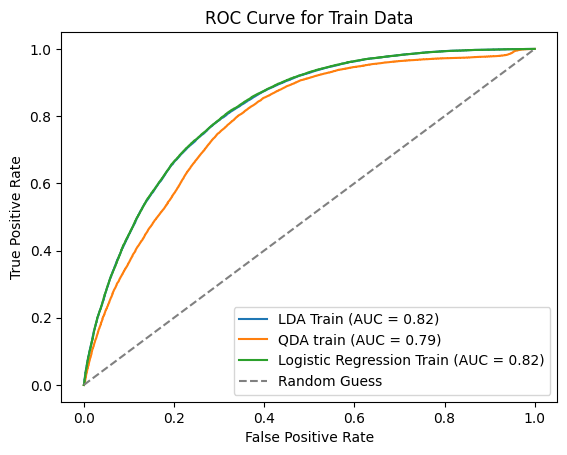

accuracy for the best LDA model in train data is 0.743


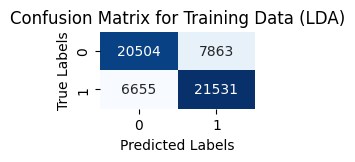

accuracy for the best QDA model in train data is 0.725


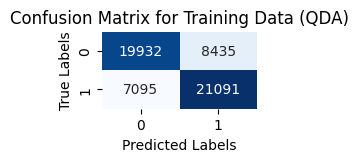

accuracy for the best logistic model in train data is 0.744


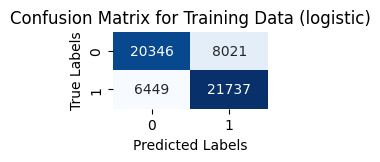

In [ ]:
## plot the train results
plt.figure()

# Plot ROC curve for LDA on train data
plt.plot(fpr_lda_train, tpr_lda_train, label='LDA Train (AUC = %0.2f)' % auc_train_lda)

# Plot ROC curve for QDA on train data
plt.plot(fpr_qda_train, tpr_qda_train, label='QDA train (AUC = %0.2f)' % auc_train_qda)

# Plot ROC curve for Logistic Regression on train data
plt.plot(fpr_logistic_train, tpr_logistic_train, label='Logistic Regression Train (AUC = %0.2f)' % auc_train_logistic)

# Plot random guess line
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Train Data')
plt.legend(loc='lower right')

# Show plot
plt.show()

#accuracy for best thrshold
print('accuracy for the best LDA model in train data is', round(accuracy_train_lda,3))
plt.figure(figsize=(2, 1))
sns.heatmap(conf_matrix_train_lda, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Training Data (LDA)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


print ('accuracy for the best QDA model in train data is' , round(accuracy_train_qda,3))
plt.figure(figsize=(2, 1))
sns.heatmap(conf_matrix_train_qda, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Training Data (QDA)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


print('accuracy for the best logistic model in train data is', round(accuracy_train_logistic,3))
plt.figure(figsize=(2, 1))
sns.heatmap(conf_matrix_train_logistic, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Training Data (logistic)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()



### **Evaluation Test**:

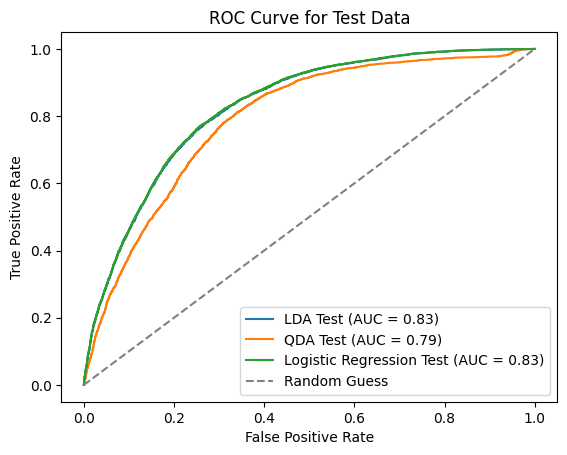

accuracy for the best LDA model in test data is 0.755


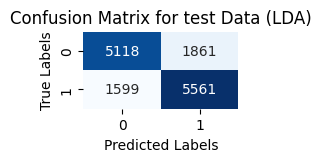

accuracy for the best QDA model in test data is 0.736


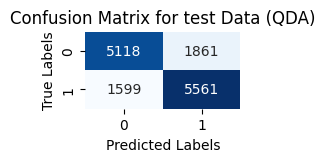

accuracy for the best logistic model in test data is 0.756


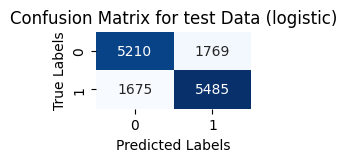

In [ ]:
# plot the test results
# Create a new figure for the test data ROC curves
plt.figure()

# Plot ROC curve for LDA on test data
plt.plot(fpr_lda_test, tpr_lda_test, label='LDA Test (AUC = %0.2f)' % auc_test_lda)

# Plot ROC curve for QDA on test data
plt.plot(fpr_qda_test, tpr_qda_test, label='QDA Test (AUC = %0.2f)' % auc_test_qda)

# Plot ROC curve for Logistic Regression on test data
plt.plot(fpr_logistic_test, tpr_logistic_test, label='Logistic Regression Test (AUC = %0.2f)' % auc_test_logistic)

# Plot random guess line
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Test Data')
plt.legend(loc='lower right')

# Show plot
plt.show()

#accuracy for the best thrashold and confusion matrix
print('accuracy for the best LDA model in test data is', round(accuracy_test_lda,3))
plt.figure(figsize=(2, 1))
sns.heatmap(conf_matrix_test_lda, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for test Data (LDA)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

print("accuracy for the best QDA model in test data is", round(accuracy_test_qda,3))
plt.figure(figsize=(2, 1))
sns.heatmap(conf_matrix_test_lda, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for test Data (QDA)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


print('accuracy for the best logistic model in test data is', round(accuracy_test_logistic,3))
plt.figure(figsize=(2, 1))
sns.heatmap(conf_matrix_test_logistic, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for test Data (logistic)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

### we can see that there is **no overfitting** in our data, the train and the test in all three models are very close to each other.
### The results show a slight advantage for the less flexible methods (LDA and LR), which indicates (a relative) linear separation between the classes.

## KNN - with reduced dimensional data
#### KNN is particularly useful when dealing with nonlinear relationships between predictors and the target variable, and we wanted to check if this classification method will preduce better preformnces (then the QDA).

#### On top of that, we decide to train the model on PCA data in order to deal with the "curse of dimensionality".

In [ ]:
# KNN
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

KNN = KNeighborsClassifier()
n_neighbors_values = range(5,200,2)
knn_cv = GridSearchCV(KNN, param_grid={'n_neighbors': n_neighbors_values}, cv = 10, n_jobs=-1, verbose=10).fit(x_train_pca, y_train)

mean_test_scores = knn_cv.cv_results_['mean_test_score']
print("Finished")




Fitting 10 folds for each of 98 candidates, totalling 980 fits
Finished


### Evaluation:
We present here the number of nearest neighbors and the **minus MSE** corresponding to them. \\
So the selected value (of K) is the highest in the graph.

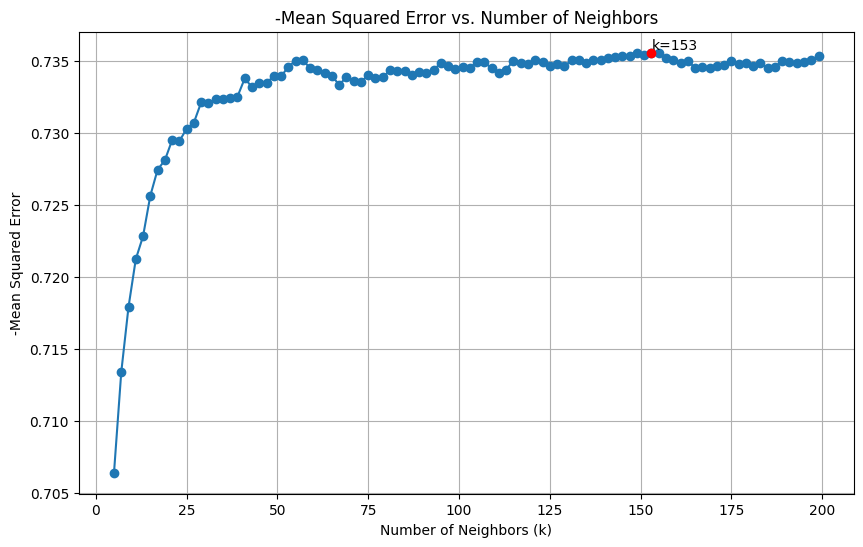

In [ ]:
n_neighbors_values = range(5,200,2)
max_mse_index = np.argmax(mean_test_scores)
max_n_neighbors = n_neighbors_values[max_mse_index]
max_mse = mean_test_scores[max_mse_index]
plt.figure(figsize=(10, 6))
plt.plot(n_neighbors_values, mean_test_scores, marker='o', linestyle='-')
plt.scatter(max_n_neighbors, max_mse, color='red', label=f'Max MSE (k={max_n_neighbors})', zorder=5)
plt.text(max_n_neighbors, max_mse, f'k={max_n_neighbors}', verticalalignment='bottom', horizontalalignment='left', color='black', fontsize=10)
plt.title('-Mean Squared Error vs. Number of Neighbors')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('-Mean Squared Error')
plt.grid(True)
plt.show()

It can be seen that the ideal K value in this model is 153, which indicates a linear seperation boundery, which is consistent with our previous conclusion about the linear methods.

KNN best parameters: {'n_neighbors': 153}
Accuracy for the best Knn model in train data is 0.738


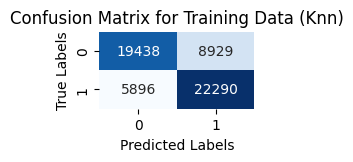

Accuracy for the best Knn model in test data is 0.748


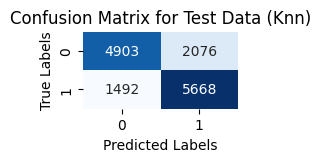

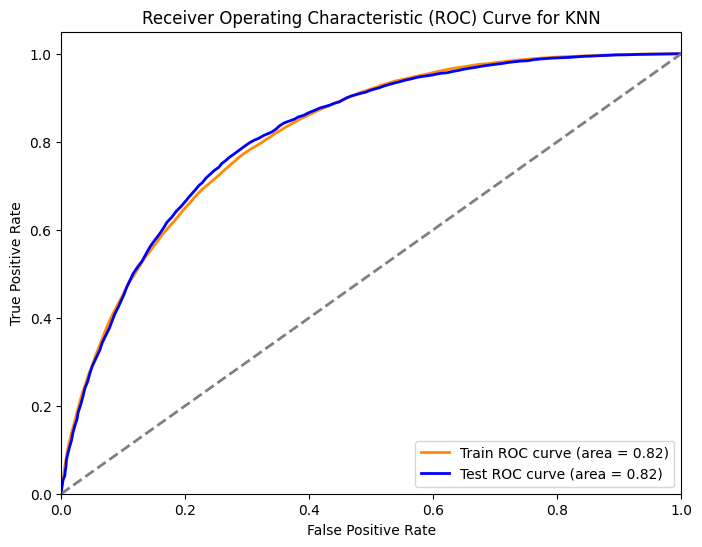

In [ ]:
# Confusion matrix
from sklearn.metrics import confusion_matrix

conf_matrix_train_knn = confusion_matrix(y_train, knn_cv.predict(x_train_pca))
conf_matrix_test_knn = confusion_matrix(y_test, knn_cv.predict(x_test_pca))

accuracy_train_knn = round(np.mean(knn_cv.predict(x_train_pca) == y_train), 3)
accuracy_test_knn = round(np.mean(knn_cv.predict(x_test_pca) == y_test), 3)

fpr_train, tpr_train, thresholds_train = roc_curve(y_train, knn_cv.predict_proba(x_train_pca)[:, 1])
roc_auc_train = auc(fpr_train, tpr_train)

fpr_test, tpr_test, thresholds_test = roc_curve(y_test, knn_cv.predict_proba(x_test_pca)[:, 1])
roc_auc_test = auc(fpr_test, tpr_test)


print(f'KNN best parameters: {knn_cv.best_params_}')
print('Accuracy for the best Knn model in train data is', accuracy_train_knn)
plt.figure(figsize=(2, 1))
sns.heatmap(conf_matrix_train_knn, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Training Data (Knn)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

print('Accuracy for the best Knn model in test data is', accuracy_test_knn)
plt.figure(figsize=(2, 1))
sns.heatmap(conf_matrix_test_knn, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Test Data (Knn)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# ROC curve and AUC
plt.figure(figsize=(8, 6))

# Plot ROC curve for training data
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label='Train ROC curve (area = %0.2f)' % roc_auc_train)

# Plot ROC curve for testing data
plt.plot(fpr_test, tpr_test, color='blue', lw=2, label='Test ROC curve (area = %0.2f)' % roc_auc_test)

# Plot random guessing line
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')

# Set axis limits and labels
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('Receiver Operating Characteristic (ROC) Curve for KNN')
plt.legend(loc='lower right')

plt.show()


Also here, we can see that the train and test have equel AUC, so there is **no** **overfit**.
We would like to add that we tested the model on normalized data, but the results were not better.



## Spline
We really wanted to try fitting spline model, altough most of out variables are binary (what may be problematic for smooth model). \\
However, we had issues when attempting to implement spline modeling in both Python and R. \\
In Python, we found that there is no existing function or package for spline modeling with multivariate data. \\
Similarly, in R, we encountered difficulties due to the "too few combinations" issue.

## **Classification Tree** method -
This method is sutiable for our data due to the fact that it can deal great with both numeric and binary variables, and easy to explain or interpret.

Fitting 10 folds for each of 2000 candidates, totalling 20000 fits


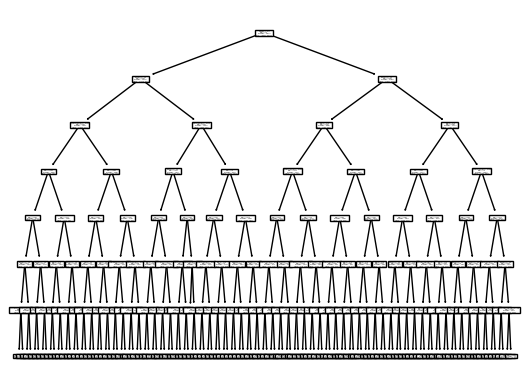

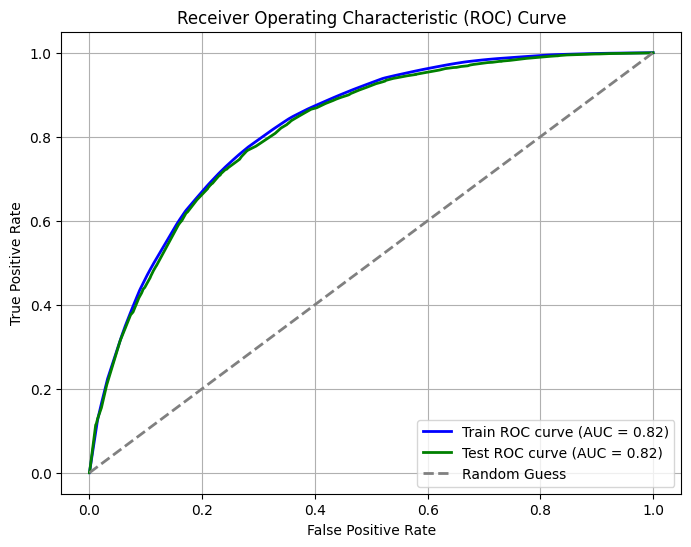

accuracy for the Classification Tree model in train data is 0.747


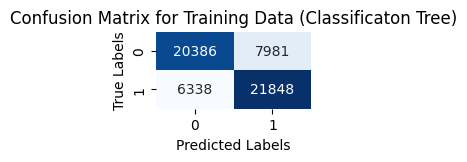

accuracy for the best Classification Tree model in Test data is 0.744


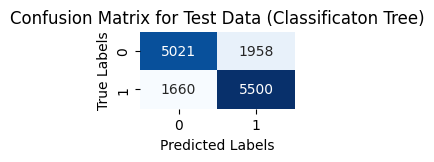

In [ ]:
#building the tree with CV to find the best hyperparmeters
from sklearn.tree import plot_tree, DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix


classification_tree = DecisionTreeClassifier(random_state=42)
parameters = {'max_depth': range(5,25),
              'min_samples_split': range(2,11),
              'min_samples_leaf': range(2,11),
              'max_features': range(10, 36)}

classification_tree_cv = RandomizedSearchCV(classification_tree, parameters, cv=10, n_iter=2000,
                                            n_jobs=-1, verbose=3).fit(x_train_reduced, y_train)


# Get the best decision tree model
best_tree = classification_tree_cv.best_estimator_

# Plot the train tree
train_tree = plot_tree(best_tree, feature_names=x_train_reduced.columns)
plt.show()

##calculating the scores for train and test
from sklearn.metrics import roc_auc_score, roc_curve, auc

#train
y_scores_train_tree = best_tree.predict_proba(x_train_reduced)[:, 1]

#test
predictions_tree_test = best_tree.predict_proba(x_test_reduced)[:, 1]

#Compute ROC curve and AUC
fpr_tree_train, tpr_tree_train, thresholds_tree_train = roc_curve(y_train, y_scores_train_tree)
auc_train_tree = auc(fpr_tree_train, tpr_tree_train)

# Compute ROC curve test
fpr_tree_test, tpr_tree_test, thresholds_tree_test = roc_curve(y_test, predictions_tree_test)

# Compute AUC
auc_score = roc_auc_score(y_test, predictions_tree_test)

#plot the ROC and the AUC of train and test
plt.figure(figsize=(8, 6))
plt.plot(fpr_tree_train, tpr_tree_train, color='blue', lw=2, label='Train ROC curve (AUC = %0.2f)' % auc_train_tree)

# Plot ROC curve for test data
plt.plot(fpr_tree_test, tpr_tree_test, color='green', lw=2, label='Test ROC curve (AUC = %0.2f)' % auc_score)

# Plot random guess line
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2, label='Random Guess')

conf_matrix_train_tree= (confusion_matrix(y_train, best_tree.predict(x_train_reduced)))
accuracy_train_tree = round(np.mean(best_tree.predict(x_train_reduced) == y_train), 3)
conf_matrix_test_tree = confusion_matrix(y_test, best_tree.predict(x_test_reduced))
accuracy_test_tree = round(np.mean(best_tree.predict(x_test_reduced) == y_test), 3)


# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


print ('accuracy for the Classification Tree model in train data is' , round(accuracy_train_tree,3))
plt.figure(figsize=(2, 1))
sns.heatmap(conf_matrix_train_tree, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Training Data (Classificaton Tree)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

print ('accuracy for the best Classification Tree model in Test data is' , round(accuracy_test_tree,3))
plt.figure(figsize=(2, 1))
sns.heatmap(conf_matrix_test_tree, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Test Data (Classificaton Tree)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()





Same as previous method, **no** **overfit**.

# **Random forest** method  -
##Although we did not see significant overfitting in the previous methods (indicating low variance), we decided to implement this method with hope for better performance.



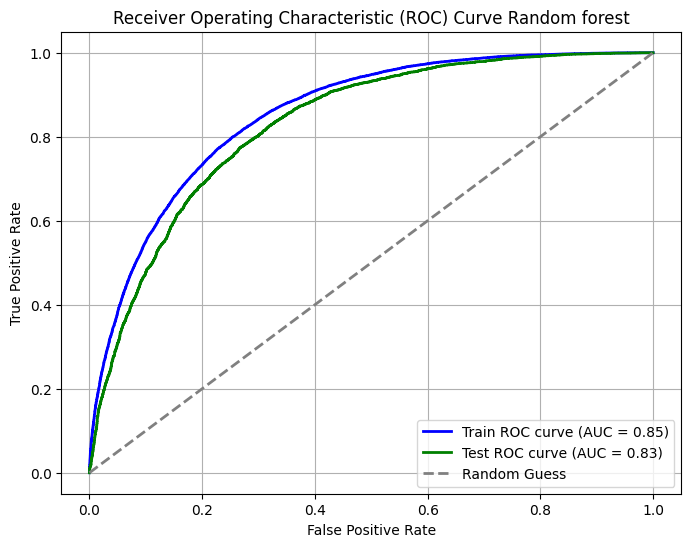

accuracy for the Random Forest model in train data is 0.772


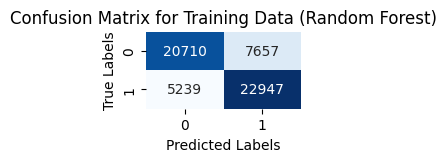

accuracy for the best Random Forest model in Test data is 0.753


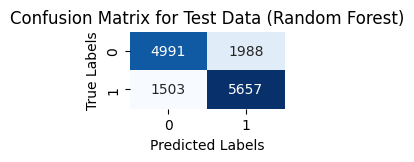

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

# Define hyperparameters for regularization
max_depth = 10
min_samples_split = 2
max_features = 'sqrt'

# Create an instance of RandomForestClassifier with regularization
random_forest_reg = RandomForestClassifier(max_depth=max_depth, min_samples_split=min_samples_split, max_features=max_features)

# Train the classifier on your training data
random_forest_reg.fit(x_train_reduced, y_train)

# Predict probabilities for train data
y_scores_train_rf_reg = random_forest_reg.predict_proba(x_train_reduced)[:, 1]

# Compute ROC curve and AUC for train data
fpr_rf_train_reg, tpr_rf_train_reg, thresholds_rf_train_reg = roc_curve(y_train, y_scores_train_rf_reg)
auc_train_rf_reg = auc(fpr_rf_train_reg, tpr_rf_train_reg)

# Predict probabilities for test data
y_scores_test_rf_reg = random_forest_reg.predict_proba(x_test_reduced)[:, 1]

# Compute ROC curve and AUC for test data
fpr_rf_test_reg, tpr_rf_test_reg, thresholds_rf_test_reg = roc_curve(y_test, y_scores_test_rf_reg)
auc_test_rf_reg = roc_auc_score(y_test, y_scores_test_rf_reg)

# Plot the ROC and the AUC of train and test
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf_train_reg, tpr_rf_train_reg, color='blue', lw=2, label='Train ROC curve (AUC = %0.2f)' % auc_train_rf_reg)
plt.plot(fpr_rf_test_reg, tpr_rf_test_reg, color='green', lw=2, label='Test ROC curve (AUC = %0.2f)' % auc_test_rf_reg)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2, label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve Random forest')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

conf_matrix_train_rf= (confusion_matrix(y_train, random_forest_reg.predict(x_train_reduced)))
accuracy_train_rf = round(np.mean(random_forest_reg.predict(x_train_reduced) == y_train), 3)
conf_matrix_test_rf = confusion_matrix(y_test, random_forest_reg.predict(x_test_reduced))
accuracy_test_rf = round(np.mean(random_forest_reg.predict(x_test_reduced) == y_test), 3)


print ('accuracy for the Random Forest model in train data is' , round(accuracy_train_rf,3))
plt.figure(figsize=(2, 1))
sns.heatmap(conf_matrix_train_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Training Data (Random Forest)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

print ('accuracy for the best Random Forest model in Test data is' , round(accuracy_test_rf,3))
plt.figure(figsize=(2, 1))
sns.heatmap(conf_matrix_test_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Test Data (Random Forest)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()




In the above method, there is a minor difference between the AUC of the train and test, but it so small we do not think it can be could a overfit.

## **Boosting** -
As we will present next, some researchs were found boosting as a useful method for this kind of data and question. That was the main reason to use both boosting and random forest (which is an expansion of boosting) methods.

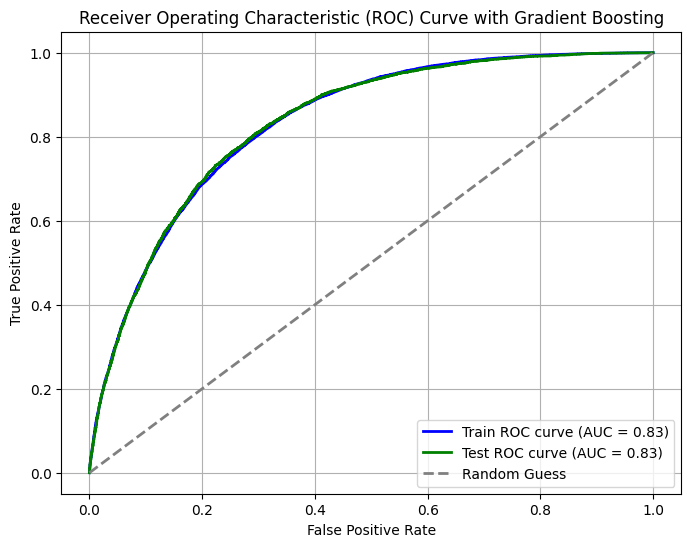

Accuracy for the Random Forest with Gradient Boosting model in train data is 0.752


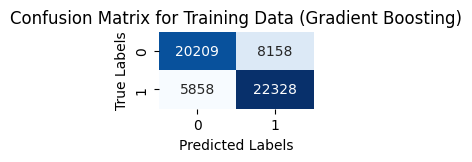

Accuracy for the best Random Forest with Gradient Boosting model in Test data is 0.756


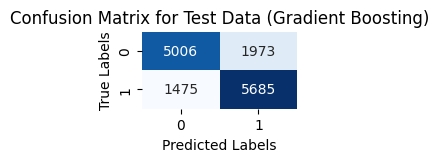

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score


learning_rate = 0.1
n_estimators = 100

# Create an instance of GradientBoostingClassifier with regularization
boosting = GradientBoostingClassifier(learning_rate=learning_rate, n_estimators=n_estimators)

# Train the classifier on your training data
boosting.fit(x_train_reduced, y_train)

# Predict probabilities for train data
y_scores_train_boosting = boosting.predict_proba(x_train_reduced)[:, 1]

# Compute ROC curve and AUC for train data
fpr_train_boosting, tpr_train_boosting, thresholds_train_boosting = roc_curve(y_train, y_scores_train_boosting)
auc_train_boosting = auc(fpr_train_boosting, tpr_train_boosting)

# Predict probabilities for test data
y_scores_test_boosting = boosting.predict_proba(x_test_reduced)[:, 1]

# Compute ROC curve and AUC for test data
fpr_test_boosting, tpr_test_boosting, thresholds_rf_test_boosting = roc_curve(y_test, y_scores_test_boosting)
auc_test_boosting = roc_auc_score(y_test, y_scores_test_boosting)

# Plot the ROC and the AUC of train and test for Gradient Boosting
plt.figure(figsize=(8, 6))
plt.plot(fpr_train_boosting, tpr_train_boosting, color='blue', lw=2, label='Train ROC curve (AUC = %0.2f)' % auc_train_boosting)
plt.plot(fpr_test_boosting, tpr_test_boosting, color='green', lw=2, label='Test ROC curve (AUC = %0.2f)' % auc_test_boosting)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2, label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve with Gradient Boosting')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

conf_matrix_train_boosting = confusion_matrix(y_train, boosting.predict(x_train_reduced))
accuracy_train_boosting = round(np.mean(boosting.predict(x_train_reduced) == y_train), 3)
conf_matrix_test_boosting = confusion_matrix(y_test, boosting.predict(x_test_reduced))
accuracy_test_boosting = round(np.mean(boosting.predict(x_test_reduced) == y_test), 3)

print('Accuracy for the Random Forest with Gradient Boosting model in train data is', round(accuracy_train_boosting, 3))
plt.figure(figsize=(2, 1))
sns.heatmap(conf_matrix_train_boosting, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Training Data (Gradient Boosting)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

print('Accuracy for the best Random Forest with Gradient Boosting model in Test data is', round(accuracy_test_boosting, 3))
plt.figure(figsize=(2, 1))
sns.heatmap(conf_matrix_test_boosting, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Test Data (Gradient Boosting)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


Likewise here, there is no over fit. \\
In addition to that, it can be seen that all the tree methods give similar results in the predictive ability.

## **SVM** - with the numeric variables only
We decided to give linear SVM a try because it's good at handling numeric data and found the seperation between those with diabetes and those without.
Radial and Polynomial SVM were tried and were removed due to very unsuscess results.

Fitting 10 folds for each of 20 candidates, totalling 200 fits


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVM Linear kernel best parameters: {'C': 2.3999999999999995, 'kernel': 'linear'}


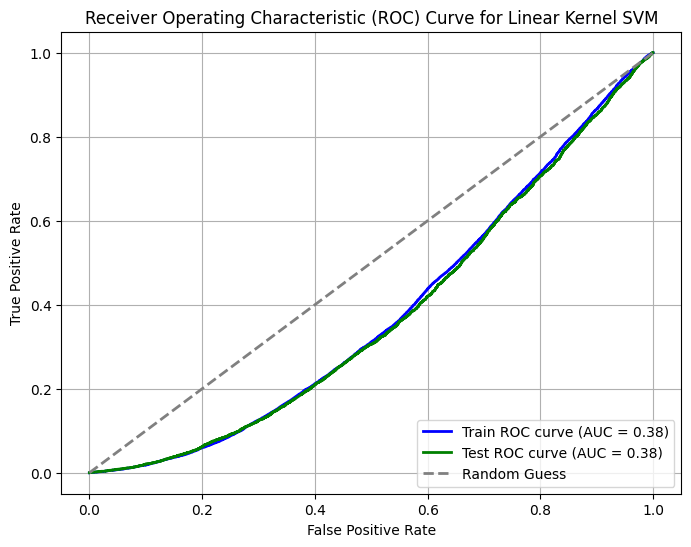

Accuracy for the best SVM Linear kernel model in train data is 0.592


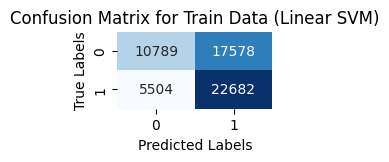

Accuracy for the best SVM Linear kernel model in test data is 0.598


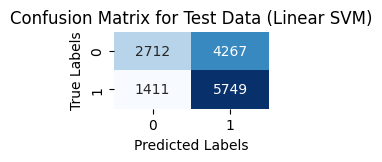

In [ ]:
from sklearn.svm import SVC

svm = SVC(probability=True, max_iter = 500, random_state=1)
parameters_linear = {'C': np.arange(1, 5, 0.2), 'kernel': ['linear']}
svm_linear_cv = GridSearchCV(svm, param_grid=parameters_linear, cv=10, n_jobs=-1, verbose=3).fit(x_train_numeric, y_train)

# Linear kernel ROC and AUC for train data
y_scores_train_svm_linear = svm_linear_cv.predict_proba(x_train_numeric)[:, 1]
fpr_train_linear, tpr_train_linear, thresholds_train_linear = roc_curve(y_train, y_scores_train_svm_linear)
auc_train_linear = auc(fpr_train_linear, tpr_train_linear)

# Linear kernel ROC and AUC for test data
y_scores_test_svm_linear = svm_linear_cv.predict_proba(x_test_numeric)[:, 1]
fpr_test_linear, tpr_test_linear, thresholds_test_linear = roc_curve(y_test, y_scores_test_svm_linear)
auc_test_linear = auc(fpr_test_linear, tpr_test_linear)

# Confusion matrix for linear kernel
conf_matrix_train_linear= (confusion_matrix(y_train, svm_linear_cv.predict(x_train_numeric)))
accuracy_train_linear = round(np.mean(svm_linear_cv.predict(x_train_numeric) == y_train), 3)
conf_matrix_test_linear = confusion_matrix(y_test, svm_linear_cv.predict(x_test_numeric))
accuracy_test_linear = round(np.mean(svm_linear_cv.predict(x_test_numeric) == y_test), 3)

print(f'SVM Linear kernel best parameters: {svm_linear_cv.best_params_}')

# Plot ROC curve for linear kernel
plt.figure(figsize=(8, 6))
plt.plot(fpr_train_linear, tpr_train_linear, color='blue', lw=2, label='Train ROC curve (AUC = %0.2f)' % auc_train_linear)
plt.plot(fpr_test_linear, tpr_test_linear, color='green', lw=2, label='Test ROC curve (AUC = %0.2f)' % auc_test_linear)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2, label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Linear Kernel SVM')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

print('Accuracy for the best SVM Linear kernel model in train data is', accuracy_train_linear)
plt.figure(figsize=(2, 1))
sns.heatmap(conf_matrix_train_linear, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Train Data (Linear SVM)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

print('Accuracy for the best SVM Linear kernel model in test data is', accuracy_test_linear)
plt.figure(figsize=(2, 1))
sns.heatmap(conf_matrix_test_linear, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Test Data (Linear SVM)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()




We can see by the ROC curve, that the SVM method is preforming worse the a random guess. that is probbley due to the use of continuous varibles only - which make up a very small part of all our variables.

## **Neural Network**
We wanted to try something more advanced, so we looked into neural networks. These are models that can handle really complex stuff. We chose **TensorFlow** because it helps make building these networks easier. While it might not always give us the absolute best model, it's a good fit for this course level. Plus, it may lets us explore our data in more detail and find hidden patterns that simpler models might miss.









In [ ]:
! pip install -q tensorflow

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Define the model
nn_model = Sequential()
input_shape = x_train_reduced.shape[1]

# Add the input layer and the first hidden layer with dropout
nn_model.add(Dense(64, activation='relu', input_shape=(input_shape,)))
nn_model.add(Dropout(0.5))

# Add a second hidden layer with dropout
nn_model.add(Dense(32, activation='relu'))
nn_model.add(Dropout(0.5))

# Add the output layer
nn_model.add(Dense(1, activation='sigmoid'))

opt = tf.keras.optimizers.Adam(learning_rate=0.001)
nn_model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with a larger batch size and more epochs
history = nn_model.fit(x_train_reduced, y_train, epochs=20, batch_size=64,
                    validation_split=0.2, callbacks=[])

Epoch 1/20
707/707 [==============================] - 3s 3ms/step - loss: 1.2475 - accuracy: 0.5333 - val_loss: 0.6717 - val_accuracy: 0.6668
Epoch 2/20
707/707 [==============================] - 2s 3ms/step - loss: 0.6708 - accuracy: 0.5842 - val_loss: 0.6316 - val_accuracy: 0.7063
Epoch 3/20
707/707 [==============================] - 2s 3ms/step - loss: 0.6311 - accuracy: 0.6271 - val_loss: 0.5826 - val_accuracy: 0.7143
Epoch 4/20
707/707 [==============================] - 2s 3ms/step - loss: 0.6000 - accuracy: 0.6742 - val_loss: 0.5668 - val_accuracy: 0.7168
Epoch 5/20
707/707 [==============================] - 3s 4ms/step - loss: 0.5800 - accuracy: 0.7014 - val_loss: 0.5492 - val_accuracy: 0.7272
Epoch 6/20
707/707 [==============================] - 2s 3ms/step - loss: 0.5692 - accuracy: 0.7125 - val_loss: 0.5446 - val_accuracy: 0.7324
Epoch 7/20
707/707 [==============================] - 2s 3ms/step - loss: 0.5630 - accuracy: 0.7167 - val_loss: 0.5447 - val_accuracy: 0.7191
Epoch 

442/442 [==============================] - 1s 2ms/step - loss: 0.5323 - accuracy: 0.7443
Accuracy for the Neural Network model in train data is 0.738


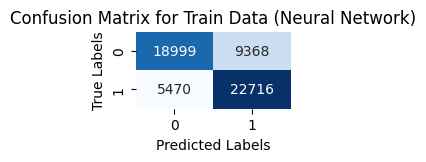

Accuracy for the best Neural Network model in test data is 0.744


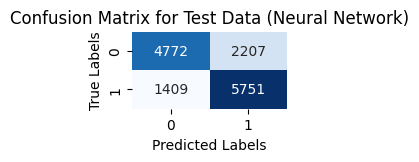

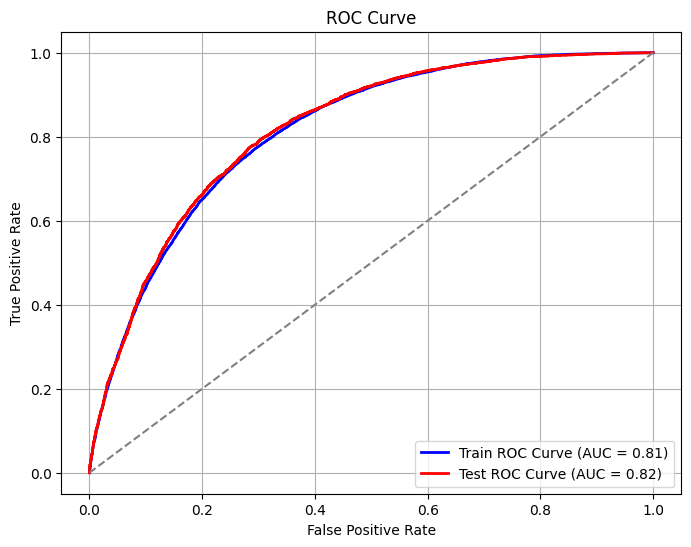

In [ ]:
# Get predicted probabilities for train and test data
y_pred_train = nn_model.predict(x_train_reduced)
y_pred_test = nn_model.predict(x_test_reduced)
y_pred_class_train = (y_pred_train > 0.5).astype(int)
y_pred_class_test = (y_pred_test > 0.5).astype(int)


# Calculate false positive rate (fpr) and true positive rate (tpr) for train data
fpr_train, tpr_train, _ = roc_curve(y_train, y_pred_train)

# Calculate false positive rate (fpr) and true positive rate (tpr) for test data
fpr_test, tpr_test, _ = roc_curve(y_test, y_pred_test)

# Calculate AUC for train data
auc_train_nn = auc(fpr_train, tpr_train)

# Calculate AUC for test data
auc_test_nn = auc(fpr_test, tpr_test)

conf_matrix_train_nn = confusion_matrix(y_train, y_pred_class_train)
_ , accuracy_train_nn = nn_model.evaluate(x_train_reduced, y_train)

conf_matrix_test_nn = confusion_matrix(y_test, y_pred_class_test)
_ , accuracy_test_nn = nn_model.evaluate(x_test_reduced, y_test)

print('Accuracy for the Neural Network model in train data is', round(accuracy_train_nn,3))
plt.figure(figsize=(2, 1))
sns.heatmap(conf_matrix_train_nn, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Train Data (Neural Network)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

print('Accuracy for the best Neural Network model in test data is', round(accuracy_test_nn,3))
plt.figure(figsize=(2, 1))
sns.heatmap(conf_matrix_test_nn, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Test Data (Neural Network)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


# Plot ROC curves for train and test data
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label=f'Train ROC Curve (AUC = {auc_train_nn:.2f})')
plt.plot(fpr_test, tpr_test, color='red', lw=2, label=f'Test ROC Curve (AUC = {auc_test_nn:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


Although a neural network has a more complex architecture than "normal" machine learning methods, it can be seen that it does not produce better results.

### **Unsupervised Learning** - we decided not to use unsupervised learning in this project, because we aim to predict diabetes, and couldn't see the big impact for us to find similar groups in the data without the capebility to know if they have diabetes or not.

## Comparison Between All Models

In [ ]:
metrics = {
    "Model": ["LDA", "QDA", "Logistic Regression", "KNN", "Single Tree Method", "Random Forest Method", "Boosting Method",
              "SVM Linear", "Neural Network"],
    "AUC Train": [auc_train_lda, auc_train_qda, auc_train_logistic, roc_auc_train, auc_train_tree,
                  auc_train_rf_reg, auc_train_boosting, auc_train_linear, auc_train_nn ],
    "AUC Test": [auc_test_lda, auc_test_qda, auc_test_logistic, roc_auc_test, auc_score,
                 auc_test_rf_reg,auc_test_boosting, auc_test_linear, auc_test_nn],
    "Accuracy Train": [accuracy_train_lda, accuracy_train_qda, accuracy_train_logistic,
                       accuracy_train_knn, accuracy_train_tree, accuracy_train_rf, accuracy_train_boosting,
                       accuracy_train_linear, accuracy_train_nn],
    "Accuracy Test": [accuracy_test_lda, accuracy_test_qda, accuracy_test_logistic,
                      accuracy_test_knn, accuracy_test_tree, accuracy_test_rf, accuracy_test_boosting,
                      accuracy_test_linear, accuracy_test_nn],
}

# Create a DataFrame from the dictionary
summary_df = pd.DataFrame(metrics)

# Function to calculate sensitivity
def sensitivity(conf_matrix):
    tp = conf_matrix[1, 1]
    fn = conf_matrix[1, 0]
    return tp / (tp + fn)

# Function to calculate specificity
def specificity(conf_matrix):
    tn = conf_matrix[0, 0]
    fp = conf_matrix[0, 1]
    return tn / (tn + fp)

# Calculate sensitivity and specificity for each model
conf_matrices_train = [conf_matrix_train_lda, conf_matrix_train_qda, conf_matrix_train_logistic,
                       conf_matrix_train_knn, conf_matrix_train_tree, conf_matrix_train_rf, conf_matrix_train_boosting,
                       conf_matrix_train_linear, conf_matrix_train_nn]

conf_matrices_test = [conf_matrix_test_lda, conf_matrix_test_qda, conf_matrix_test_logistic,
                      conf_matrix_test_knn, conf_matrix_test_tree, conf_matrix_test_rf, conf_matrix_test_boosting,
                      conf_matrix_test_linear, conf_matrix_test_nn]

sens_train = [sensitivity(conf_matrix) for conf_matrix in conf_matrices_train]
sens_test = [sensitivity(conf_matrix) for conf_matrix in conf_matrices_test]
spec_train = [specificity(conf_matrix) for conf_matrix in conf_matrices_train]
spec_test = [specificity(conf_matrix) for conf_matrix in conf_matrices_test]

# Add sensitivity and specificity to the DataFrame
summary_df["Sensitivity Train"] = sens_train
summary_df["Sensitivity Test"] = sens_test
summary_df["Specificity Train"] = spec_train
summary_df["Specificity Test"] = spec_test


column_colors = {
    "Train": "lightblue",
    "Test": "offwhite"
}

# Style the DataFrame for better visualization
styled_summary = summary_df.style.applymap(lambda value: f"background-color: {column_colors['Train']}",
                                           subset=pd.IndexSlice[:, [ "AUC Train", "Accuracy Train",
                                                                    "Sensitivity Train", "Specificity Train"]]) \
    .applymap(lambda value: f"background-color: {column_colors['Test']}",
              subset=pd.IndexSlice[:, ["Model", "AUC Test", "Accuracy Test", "Sensitivity Test", "Specificity Test"]]) \
    .format({"AUC Train": "{:.2f}", "AUC Test": "{:.2f}", "Accuracy Train": "{:.3f}",
             "Accuracy Test": "{:.3f}", "Sensitivity Train": "{:.3f}",
             "Sensitivity Test": "{:.3f}", "Specificity Train": "{:.3f}",
             "Specificity Test": "{:.3f}"})

# Display the styled summary DataFrame
styled_summary

,Model,AUC Train,AUC Test,Accuracy Train,Accuracy Test,Sensitivity Train,Sensitivity Test,Specificity Train,Specificity Test
0,LDA,0.82,0.83,0.743,0.755,0.764,0.777,0.723,0.733
1,QDA,0.79,0.79,0.725,0.736,0.748,0.780,0.703,0.691
2,Logistic Regression,0.82,0.83,0.744,0.756,0.771,0.766,0.717,0.747
3,KNN,0.82,0.82,0.738,0.748,0.791,0.792,0.685,0.703
4,Single Tree Method,0.82,0.82,0.747,0.744,0.775,0.768,0.719,0.719
5,Random Forest Method,0.85,0.83,0.772,0.753,0.814,0.790,0.730,0.715
6,Boosting Method,0.83,0.83,0.752,0.756,0.792,0.794,0.712,0.717
7,SVM Linear,0.38,0.38,0.592,0.598,0.805,0.803,0.380,0.389
8,Neural Network,0.81,0.82,0.738,0.744,0.806,0.803,0.670,0.684


## **Conclusion**


### Best accuracy test:

In [ ]:
top_models = summary_df.nlargest(3, 'Accuracy Test')['Model']
top_models_indices = top_models.index
top_models_summary = styled_summary.data.loc[top_models_indices]
print(top_models_summary)

                 Model  AUC Train  AUC Test  Accuracy Train  Accuracy Test  \
2  Logistic Regression   0.820883  0.827874        0.744134       0.756418   
6      Boosting Method   0.831708  0.832330        0.752000       0.756000   
0                  LDA   0.820074  0.827155        0.743285       0.755287   

   Sensitivity Train  Sensitivity Test  Specificity Train  Specificity Test  
2           0.771198          0.766061           0.717242          0.746525  
6           0.792166          0.793994           0.712412          0.717295  
0           0.763890          0.776676           0.722812          0.733343  


**LDA**, **Logistic Regression**, and **Boosting** are the methods with the highest accuracy in the test data, with approximately 75-76% correct predictions of diabetes. \\
However, each one of those methods excels in different aspects. \\
**Logistic Regression** succeeded more in predicting **specificity**, indicating its strength in correctly identifying **non-diabetic cases**. \\
On the other hand, **Boosting** performed better in **sensitivity**, highlighting its capability to accurately detect **diabetic cases**. \\
It is important to note that other researchers studying the prediction of diabetes have also reported the **Boosting** method as the best-performing for this task, underlining its effectiveness in this domain.

Refrences:

- Fregoso-Aparicio, L., Noguez, J., Montesinos, L. et al. Machine learning and deep learning predictive models for type 2 diabetes: a systematic review. Diabetol Metab Syndr 13, 148 (2021). https://doi.org/10.1186/s13098-021-00767-9
- Lai, H., Huang, H., Keshavjee, K. et al. Predictive models for diabetes mellitus using machine learning techniques. BMC Endocr Disord 19, 101 (2019). https://doi.org/10.1186/s12902-019-0436-6
- Kulkarni, G.N., Ambesange, S., Preethi, A., Vijayalaxmi, A. (2021). Diabetes Prediction Using Boosting Algorithms: Performance Comparison. In: Venugopal, K.R., Shenoy, P.D., Buyya, R., Patnaik, L.M., Iyengar, S.S. (eds) Data Science and Computational Intelligence. ICInPro 2021. Communications in Computer and Information Science, vol 1483. Springer, Cham. https://doi.org/10.1007/978-3-030-91244-4_18


